In [11]:
import pandas as pd 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as pyplot
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saicharangangili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data = pd.read_csv('flipkart_data.csv')
data.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [13]:
pd.unique(data['rating'])


array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

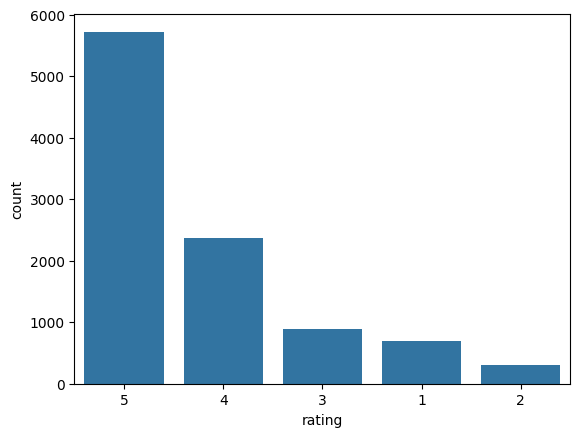

In [14]:
sns.countplot(data=data,x='rating',order=data.rating.value_counts().index)                  #Order to plot the categorical levels in;

In [15]:

pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg


In [16]:
nltk.download('punkt')
from tqdm import tqdm
import re
def preprocess_text(text_data): 
    preprocessed_text = [] 

    for sentence in tqdm(text_data): 
        sentence = re.sub(r'[^\w\s]', '', sentence) 

        preprocessed_text.append(' '.join(token.lower() 
        for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords.words('english'))) 

    return preprocessed_text
  

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saicharangangili/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
import nltk
import re
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure required NLTK resources are downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Preloading stopwords for efficiency
stop_words = set(stopwords.words('english'))

def preprocess_text(text_data): 
    preprocessed_text = [] 
    for sentence in tqdm(text_data): 
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)
        
        # Tokenizing, lowercasing, and removing stopwords
        preprocessed_text.append(' '.join(
            token.lower() 
            for token in word_tokenize(sentence) 
            if token.lower() not in stop_words.words('english')
        ))
    return preprocessed_text


In [25]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review


  0%|          | 0/9976 [00:00<?, ?it/s]


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/saicharangangili/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
data.head()


In [ ]:
data.head()


In [ ]:
consolidated = ' '.join(
    word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()


In [ ]:
X


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 

#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))



In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True]) 

cm_display.plot() 
plt.show()
